# Digits and NN

In [1]:
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

digits = datasets.load_digits()

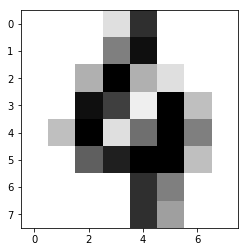

In [2]:
plt.imshow(digits.images[100], cmap=plt.cm.gray_r)


Let's split the data into train and test using sklearn's function.

Before splitting it, we convert it into one-hot encoding: instead of having a vector such as $(1, 2, 10, \ldots)$ we have a matrix with 10 columns with just "one-hot" position with a one.

In [3]:
import keras

X, y = digits.data, digits.target

y = keras.utils.to_categorical(y)

X_train, X_test, y_train, y_test = train_test_split(X, y)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

Using TensorFlow backend.
/home/marat/.pyenv/versions/3.6.0/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


((1347, 64), (1347, 10), (450, 64), (450, 10))

## Feed-forward network

Let's define our model. 

It will be have 64 input, a hidden layer of 128 neurons, and a softmax layer of 10 units (one per possible digit)

In [4]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(128, input_dim=64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss="categorical_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

In [5]:
model.fit(X_train, y_train, epochs=10, batch_size=50)

Epoch 1/10
1347/1347 [==============================] - 0s 109us/step - loss: 2.3484 - acc: 0.4759
Epoch 2/10
1347/1347 [==============================] - 0s 49us/step - loss: 0.4586 - acc: 0.8552
Epoch 3/10
1347/1347 [==============================] - 0s 48us/step - loss: 0.2304 - acc: 0.9302
Epoch 4/10
1347/1347 [==============================] - 0s 48us/step - loss: 0.1440 - acc: 0.9569
Epoch 5/10
1347/1347 [==============================] - 0s 48us/step - loss: 0.1014 - acc: 0.9681
Epoch 6/10
1347/1347 [==============================] - 0s 50us/step - loss: 0.0726 - acc: 0.9762
Epoch 7/10
1347/1347 [==============================] - 0s 46us/step - loss: 0.0634 - acc: 0.9844
Epoch 8/10
1347/1347 [==============================] - 0s 50us/step - loss: 0.0439 - acc: 0.9896
Epoch 9/10
1347/1347 [==============================] - 0s 46us/step - loss: 0.0310 - acc: 0.9926
Epoch 10/10
1347/1347 [==============================] - 0s 54us/step - loss: 0.0273 - acc: 0.9941


In [6]:
model.evaluate(X_test, y_test)

450/450 [==============================] - 0s 82us/step


[0.085543088593080435, 0.96666666666666667]

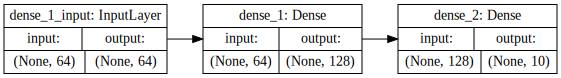

In [10]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model, show_shapes=True, rankdir='LR').create(prog='dot', format='svg'))